# Deep Neural Networks with Keras

## Using the mfeat-pix.txt data

This code was taken from https://physics.bu.edu/~pankajm/ML-Notebooks/HTML/NB11_CIX-DNN_mnist_Keras.html. Some modifications were applied in order to read the mfeat-pix.txt data.

In [1]:
import pandas as pd
import numpy  as np
from numpy.linalg import inv
from scipy.linalg import block_diag

mfeat_pix = pd.read_csv('mfeat-pix.txt',sep='\s+',header=None)
mfeat_pix = pd.DataFrame(mfeat_pix)
rows = 15
cols = 16

pickIndices_trainFinal = [j+200*i for i in range(0, 10, 1) for j in range(0, 180, 1)]
pickIndices_testFinal  = [j - 20 + 200*(i+1) for i in range(0, 10, 1) for j in range(0, 20, 1)]

#print(pickIndices_trainFinal)
#print(pickIndices_testFinal)
meanTrainImagesFinal = [([0]*10) for i in range(240)]

trainPatternsFinal = []
testPatternsFinal  = []

for i in pickIndices_trainFinal:
    temp_trainFinal = []
    for j in range(rows*cols):
        temp_trainFinal.append(mfeat_pix[j][i])
        #temp_testFinal.append(mfeat_pix[j][i+100])
    trainPatternsFinal.append(temp_trainFinal)
    #testPatternsFinal.append(temp_testFinal)

for i in pickIndices_testFinal:
    temp_testFinal = []
    for j in range(rows*cols):
        #temp_trainFinal.append(mfeat_pix[j][i])
        temp_testFinal.append(mfeat_pix[j][i])
    #trainPatternsFinal.append(temp_trainFinal)
    testPatternsFinal.append(temp_testFinal)

In [2]:
def cross_validation_split(trainPatternsFinal):
  #split to 160 training and 20 testing data for cross validation
  pickIndices_train = [j+180*i for i in range(0, 10, 1) for j in range(0, 180, 1)]
  pickIndices_test = []
  number_of_tests = 20
  number_of_digits = 10
  for i in range(number_of_digits):
    j = 0
    while j < number_of_tests:
      tmp_pick = 180*i + int(np.random.uniform()*180)
      if tmp_pick in pickIndices_test:
        j -= 1
      else:
        pickIndices_test.append(tmp_pick) 
      j += 1
  pickIndices_test.sort()
  for obj in pickIndices_test:
    pickIndices_train.remove(obj)
  #print(pickIndices_train)
  #print(pickIndices_test)
  #meanTrainImages = [([0]*10) for i in range(240)]

  trainPatterns = []
  testPatterns  = []

  for i in pickIndices_train:
      temp_train = []
      #print(i)
      for j in range(rows*cols):
          temp_train.append(trainPatternsFinal[i][j])  
      trainPatterns.append(temp_train)

  for i in pickIndices_test:
      temp_test = []
      for j in range(rows*cols):
          temp_test.append(trainPatternsFinal[i][j])
      testPatterns.append(temp_test)
  
  meanTrainImages = [] #240x10

  for i in range(0, 240):
    temp = []
    for j in range(0,10):
        mean = 0
        for k in range(j*160,(j+1)*160):
            mean += trainPatterns[k][i]
        #print(i,j*100,(j+1)*100, "mean: ", mean) 
        temp.append(mean/160)
    meanTrainImages.append(temp)

  #pd.DataFrame(meanTrainImages)

  #pd.DataFrame(trainPatterns)
  ##pd.DataFrame(pickIndices_train)
  #pd.DataFrame(pickIndices_test)
  return trainPatterns, testPatterns, meanTrainImages

In [3]:
X_train, X_test, z = cross_validation_split(trainPatternsFinal)
X_train = np.array(X_train)
X_test = np.array(X_test)

In [4]:
np.shape(X_train), np.shape(X_test), np.shape(z)

((1600, 240), (200, 240), (240, 10))

In [5]:
testPatternsFinal = np.array(testPatternsFinal)

In [6]:
###################################################################################
### defining the trainlabels   160 IS THE NUMBER OF DATA
b = np.ones(160)
trainLabels = block_diag(*([b] * 10))
#testLabels  = trainLabels

c = np.ones(20)
testLabels  = block_diag(*([c] * 10))

Y_train = np.transpose(trainLabels)
Y_test = np.transpose(testLabels)

##################################################################################

In [7]:
np.shape(X_train), np.shape(X_test), np.shape(Y_test), np.shape(Y_train)
#pd.DataFrame(correctLabelsTrain)
#pd.DataFrame(trainLabels)

((1600, 240), (200, 240), (200, 10), (1600, 10))

In [8]:
from __future__ import print_function
import keras,sklearn
# suppress tensorflow compilation warnings
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
import tensorflow as tf
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
import numpy as np
seed=0
np.random.seed(seed) # fix random seed
tf.random.set_seed(seed)
import matplotlib.pyplot as plt

2022-02-06 02:47:05.908543: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib/x86_64-linux-gnu:
2022-02-06 02:47:05.908572: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


an example of a data point with label [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


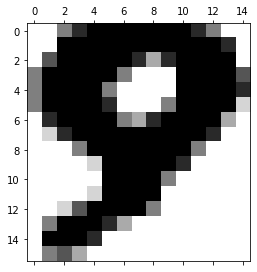

X_train shape: (1600, 240)
Y_train shape: (1600, 10)

1600 train samples
200 test samples


In [9]:
from keras.datasets import mnist

# input image dimensions
num_classes = 10 # 10 digits

#img_rows, img_cols = 28, 28 # number of pixels 
img_rows, img_cols = 16, 15 # number of pixels 

# the data, shuffled and split between train and test sets
#(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

# reshape data, depending on Keras backend
X_train = X_train.reshape(X_train.shape[0], img_rows*img_cols)
X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)
    
# cast floats to single precesion
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# rescale data in interval [0,1]
X_train /= 255
X_test /= 255

# look at an example of data point
print('an example of a data point with label', Y_train[1599])
plt.matshow(X_train[1599,:].reshape(16,15),cmap='binary')
plt.show()

# convert class vectors to binary class matrices
#Y_train = keras.utils.np_utils.to_categorical(Y_train, num_classes)
#Y_test = keras.utils.np_utils.to_categorical(Y_test, num_classes)

print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)
print()
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

In [10]:
import pandas as pd
#pd.DataFrame(X_train)
np.shape(X_train), np.shape(X_test), np.shape(Y_test), np.shape(Y_train)
#pd.DataFrame(Y_train)

((1600, 240), (200, 240), (200, 10), (1600, 10))

In [11]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D


def create_DNN():
    # instantiate model
    model = Sequential()
    # add a dense all-to-all relu layer
    model.add(Dense(400,input_shape=(img_rows*img_cols,), activation='relu'))
    # add a dense all-to-all relu layer
    model.add(Dense(100, activation='relu'))
    # apply dropout with rate 0.5
    model.add(Dropout(0.5))
    # soft-max layer
    model.add(Dense(num_classes, activation='softmax'))
    
    return model

print('Model architecture created successfully!')

Model architecture created successfully!


In [17]:
def compile_model(optimizer=tf.keras.optimizers.Adam()):
    # create the mode
    model=create_DNN()
    # compile the model
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=optimizer,
                  metrics=['accuracy'])
    return model

print('Model compiled successfully and ready to be trained.')

Model compiled successfully and ready to be trained.


In [18]:
# training parameters
batch_size = 32
epochs = 15

# create the deep neural net
model_DNN=compile_model()

# train DNN and store training info in history
history=model_DNN.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, Y_test))

Epoch 1/15
50/50 [==============================] - 1s 4ms/step - loss: 2.1742 - accuracy: 0.3781 - val_loss: 1.9218 - val_accuracy: 0.6900
Epoch 2/15
50/50 [==============================] - 0s 2ms/step - loss: 1.4962 - accuracy: 0.6406 - val_loss: 1.0018 - val_accuracy: 0.8450
Epoch 3/15
50/50 [==============================] - 0s 3ms/step - loss: 0.8874 - accuracy: 0.7619 - val_loss: 0.6080 - val_accuracy: 0.8200
Epoch 4/15
50/50 [==============================] - 0s 2ms/step - loss: 0.6420 - accuracy: 0.8150 - val_loss: 0.4430 - val_accuracy: 0.9150
Epoch 5/15
50/50 [==============================] - 0s 2ms/step - loss: 0.5296 - accuracy: 0.8562 - val_loss: 0.3457 - val_accuracy: 0.9350
Epoch 6/15
50/50 [==============================] - 0s 2ms/step - loss: 0.4541 - accuracy: 0.8731 - val_loss: 0.2925 - val_accuracy: 0.9350
Epoch 7/15
50/50 [==============================] - 0s 2ms/step - loss: 0.3813 - accuracy: 0.9025 - val_loss: 0.2627 - val_accuracy: 0.9450
Epoch 8/15
50/50 [==

7/7 [==============================] - 0s 2ms/step - loss: 0.1225 - accuracy: 0.9800

Test loss: 0.12254557013511658
Test accuracy: 0.9800000190734863


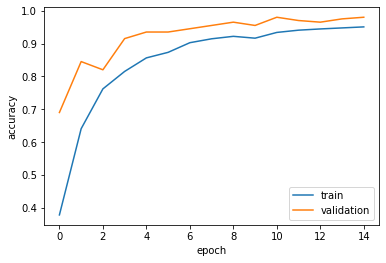

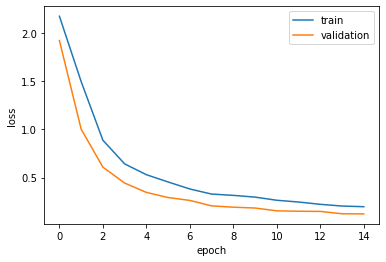

In [20]:
# evaluate model
score = model_DNN.evaluate(X_test, Y_test, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# look into training history

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('accuracy') #model accuracy
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='best')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('loss') #model loss
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='best')
plt.show()

In [21]:
print("test error rate: ", (1- score[1])*100, "%")

test error rate:  1.9999980926513672 %


# Modify the Hyperparameters to Optimize Performance of the Model

In [16]:
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier

# call Keras scikit wrapper
model_gridsearch = KerasClassifier(build_fn=compile_model, 
                        epochs=1, 
                        batch_size=batch_size, 
                        verbose=1)

# list of allowed optional arguments for the optimizer, see `compile_model()`
optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']
# define parameter dictionary
param_grid = dict(optimizer=optimizer)
# call scikit grid search module
grid = GridSearchCV(estimator=model_gridsearch, param_grid=param_grid, n_jobs=1, cv=4)
grid_result = grid.fit(X_train,Y_train)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

/tmp/ipykernel_101129/2803528753.py:5: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model_gridsearch = KerasClassifier(build_fn=compile_model,


50/50 [==============================] - 0s 1ms/step - loss: 2.3046 - accuracy: 0.0769
Best: 0.135625 using {'optimizer': 'Adadelta'}
0.000000 (0.000000) with: {'optimizer': 'SGD'}
0.000000 (0.000000) with: {'optimizer': 'RMSprop'}
0.000000 (0.000000) with: {'optimizer': 'Adagrad'}
0.135625 (0.122492) with: {'optimizer': 'Adadelta'}
0.000000 (0.000000) with: {'optimizer': 'Adam'}
0.000000 (0.000000) with: {'optimizer': 'Adamax'}
0.000000 (0.000000) with: {'optimizer': 'Nadam'}


# Convolutional Neural Networks with Keras

In [22]:
# reshape data, depending on Keras backend
if keras.backend.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
    
print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)
print()
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (1600, 16, 15, 1)
Y_train shape: (1600, 10)

1600 train samples
200 test samples


In [103]:
from tensorflow.keras import regularizers

def create_CNN():
    # instantiate model
    model = Sequential()
    # add first convolutional layer with 10 filters (dimensionality of output space)
    model.add(Conv2D(10, kernel_size=(4, 4),
                     activation='relu',
                     input_shape=input_shape))
    # add 2D pooling layer
    model.add(MaxPooling2D(pool_size=(2, 2)))
    # add second convolutional layer with 20 filters
    model.add(Conv2D(20, (4, 4), activation='relu'))
    # apply dropout with rate 0.5
    model.add(Dropout(0.45)) 
    # add 2D pooling layer
    model.add(MaxPooling2D(pool_size=(2, 2)))
    # flatten data
    model.add(Flatten())
    # add a dense all-to-all relu layer
    model.add(Dense(20*4*4, activation='relu'))
    # apply dropout with rate 0.15
    model.add(Dropout(0.45))
    # soft-max layer
    model.add(Dense(num_classes, activation='softmax'))
    
    # compile the model
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer='Adam', #'SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam'
                  metrics=['accuracy'])
    
    return model



In [104]:
np.shape(X_train), np.shape(X_test)

((1600, 16, 15, 1), (200, 16, 15, 1))

In [105]:
# training parameters
batch_size = 32
epochs = 100

# create the deep conv net
model_CNN=create_CNN()

# train CNN
history2 = model_CNN.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, Y_test))#testPatternsFinal, X_test

# evaliate model
score = model_CNN.evaluate(X_test, Y_test, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/100
50/50 [==============================] - 1s 5ms/step - loss: 2.2987 - accuracy: 0.1356 - val_loss: 2.2928 - val_accuracy: 0.2400
Epoch 2/100
50/50 [==============================] - 0s 3ms/step - loss: 2.2234 - accuracy: 0.2731 - val_loss: 2.1649 - val_accuracy: 0.4350
Epoch 3/100
50/50 [==============================] - 0s 4ms/step - loss: 1.8400 - accuracy: 0.3963 - val_loss: 1.7411 - val_accuracy: 0.4550
Epoch 4/100
50/50 [==============================] - 0s 4ms/step - loss: 1.4252 - accuracy: 0.5088 - val_loss: 1.4234 - val_accuracy: 0.5950
Epoch 5/100
50/50 [==============================] - 0s 4ms/step - loss: 1.2163 - accuracy: 0.5575 - val_loss: 1.2686 - val_accuracy: 0.6200
Epoch 6/100
50/50 [==============================] - 0s 3ms/step - loss: 1.1245 - accuracy: 0.5944 - val_loss: 1.1239 - val_accuracy: 0.7000
Epoch 7/100
50/50 [==============================] - 0s 3ms/step - loss: 1.0306 - accuracy: 0.6306 - val_loss: 1.0527 - val_accuracy: 0.7200
Epoch 8/100
5

7/7 [==============================] - 0s 3ms/step - loss: 0.1791 - accuracy: 0.9650

Test loss: 0.17910771071910858
Test accuracy: 0.9649999737739563


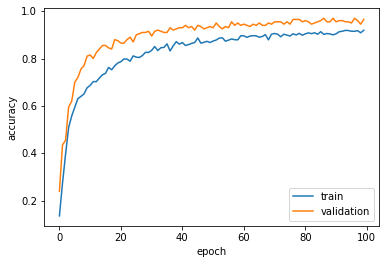

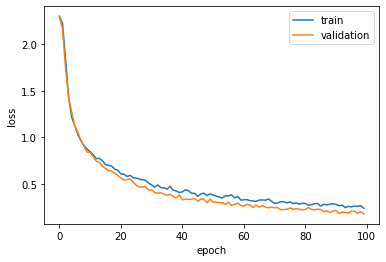

In [106]:
# evaluate model
score = model_CNN.evaluate(X_test, Y_test, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# look into training history

# summarize history for accuracy
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.ylabel('accuracy') #model accuracy
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='best')
plt.show()

# summarize history for loss
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.ylabel('loss') #model loss
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='best')
plt.show()

In [107]:
# reshape data, depending on Keras backend
if keras.backend.image_data_format() == 'channels_first':
    testPatternsFinal = testPatternsFinal.reshape(testPatternsFinal.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    testPatternsFinal = testPatternsFinal.reshape(testPatternsFinal.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
    
print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)
print()
print(X_train.shape[0], 'train samples')
print(testPatternsFinal.shape[0], 'test samples')

X_train shape: (1600, 16, 15, 1)
Y_train shape: (1600, 10)

1600 train samples
200 test samples


In [108]:
# evaliate model
score = model_CNN.evaluate(testPatternsFinal, Y_test, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

7/7 [==============================] - 0s 2ms/step - loss: 134.6316 - accuracy: 0.7000

Test loss: 134.63157653808594
Test accuracy: 0.699999988079071
